## House Price

In [0]:
!pip install -q fastai==0.7.0 torchtext==0.2.3

    100% |████████████████████████████████| 122kB 6.8MB/s 
    100% |████████████████████████████████| 51kB 13.5MB/s 
    100% |████████████████████████████████| 3.6MB 10.5MB/s 
    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 1.5MB 6.2MB/s 
    100% |████████████████████████████████| 61kB 17.6MB/s 
    100% |████████████████████████████████| 48.5MB 1.2MB/s 
    100% |████████████████████████████████| 81kB 23.8MB/s 
mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from fastai.column_data import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics

In [0]:
PATH = Path("data/house_price/")
os.makedirs(PATH, exist_ok=True)

In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p {PATH}

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.5MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.2MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.1MB/s]


## Look at the dataset

In [0]:
train_df = pd.read_csv(PATH/'train.csv', low_memory=False)
test_df = pd.read_csv(PATH/'test.csv', low_memory=False)
len(train_df), len(train_df.columns), len(test_df), len(test_df.columns)

(1460, 81, 1459, 80)

In [0]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train_cats(train_df)
df, y, nas = proc_df(train_df, 'SalePrice')
yl = np.log(y)
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
%time m.fit(df, yl)
m.score(df, yl), m.oob_score_

CPU times: user 2.88 s, sys: 13.6 ms, total: 2.9 s
Wall time: 1.59 s


(0.9824407501222306, 0.8704055017750906)

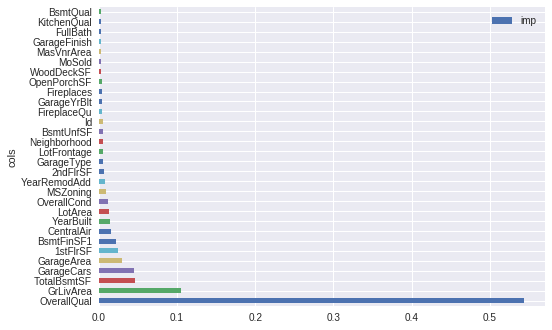

In [0]:
fi = rf_feat_importance(m, df)
fi[:30].plot('cols', 'imp', 'barh')

In [0]:
fi[:20]

,cols,imp
17,OverallQual,0.544018
46,GrLivArea,0.104832
38,TotalBsmtSF,0.046551
61,GarageCars,0.045106
62,GarageArea,0.028933
43,1stFlrSF,0.024327
34,BsmtFinSF1,0.021868
41,CentralAir,0.016049
19,YearBuilt,0.014344
4,LotArea,0.012835


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


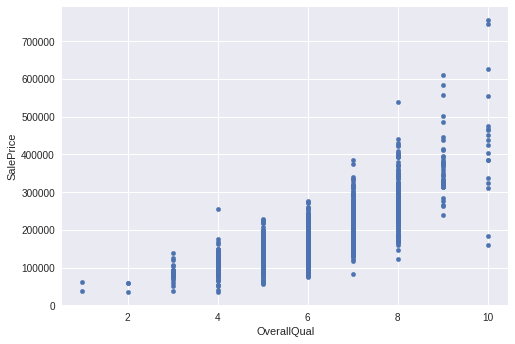

In [0]:
train_df.plot('OverallQual', 'SalePrice', 'scatter')

In [0]:
train_df[(train_df.OverallQual == 10) & (train_df.SalePrice < 200000)][['GrLivArea', 'YearBuilt', 'YrSold']]

,GrLivArea,YearBuilt,YrSold
523,4676,2007,2007
1298,5642,2008,2008


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


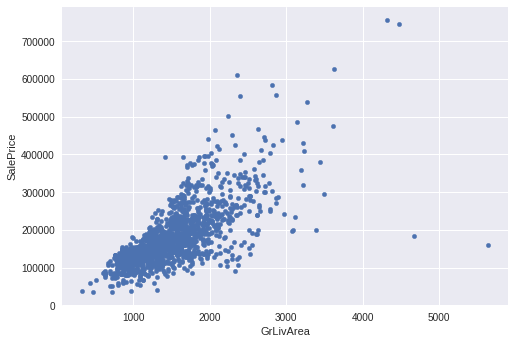

In [0]:
train_df.plot('GrLivArea', 'SalePrice', 'scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


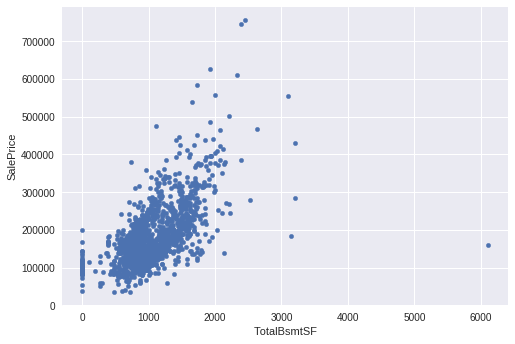

In [0]:
train_df.plot('TotalBsmtSF', 'SalePrice', 'scatter')

In [0]:
train_df[(train_df.TotalBsmtSF > 4000)][['GrLivArea', 'OverallQual', 'SalePrice']]

,GrLivArea,OverallQual,SalePrice
1298,5642,10,160000


In [0]:
train_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [0]:
train_df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


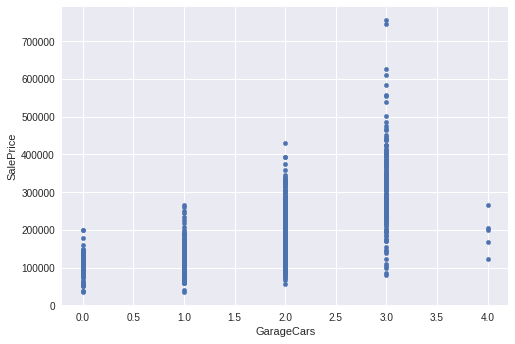

In [0]:
train_df.plot('GarageCars', 'SalePrice', 'scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


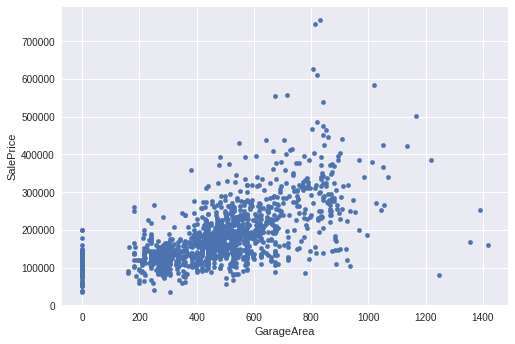

In [0]:
train_df.plot('GarageArea', 'SalePrice', 'scatter')

In [0]:
train_df[(train_df.GarageCars > 3)][['GrLivArea', 'GarageArea', 'OverallQual', 'SalePrice']]

,GrLivArea,GarageArea,OverallQual,SalePrice
420,1344,784,7,206300
747,2640,864,7,265979
1190,1622,1356,4,168000
1340,872,480,4,123000
1350,2634,968,5,200000


In [0]:
train_df.GarageArea.median(), train_df.GarageCars.median()

(480.0, 2.0)

In [0]:
# train_df.loc[1340, 'GarageCars'] = 2

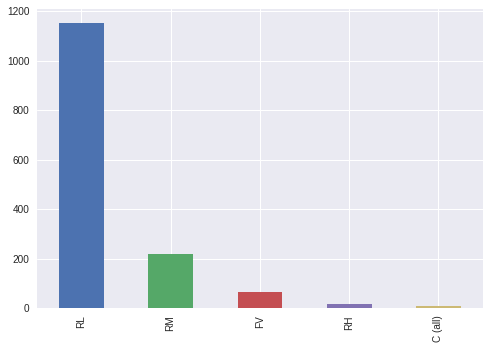

In [0]:
train_df['MSZoning'].value_counts().plot(kind='bar')

In [0]:
train_df.YearRemodAdd.isna().sum(), test_df.YearRemodAdd.isna().sum(), 

(0, 0)

In [0]:
train_df['CentralAir'] = train_df['CentralAir'].astype('category').cat.as_ordered()
train_df['CentralAir'] = train_df['CentralAir'].cat.codes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


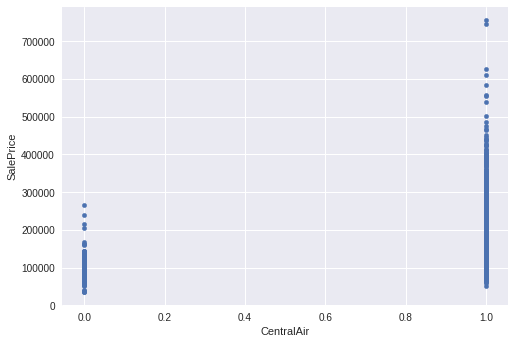

In [0]:
train_df.plot('CentralAir', 'SalePrice', 'scatter')

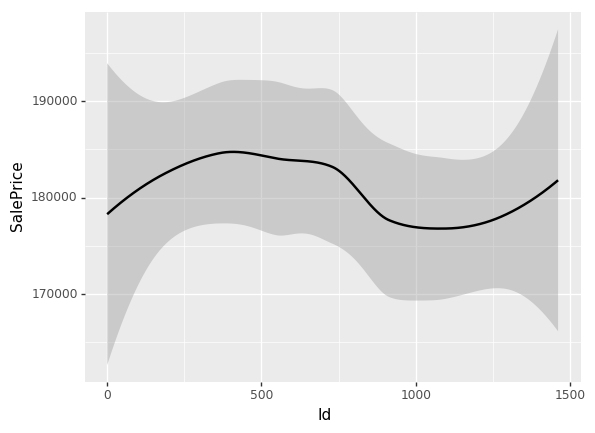

<ggplot: (8753783704801)>

In [0]:
ggplot(train_df, aes('Id', 'SalePrice')) + stat_smooth(se=True, method='loess')

## Feature Engineering

In [0]:
train_df = pd.read_csv(PATH/'train.csv', low_memory=False)
test_df = pd.read_csv(PATH/'test.csv', low_memory=False)

In [0]:
df = pd.concat([train_df, test_df], ignore_index=True)

idxs = df[df['GarageYrBlt'].isna()].index
df.loc[idxs, 'GarageYrBlt'] = df.loc[idxs, 'YearBuilt']
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

df['YBElapsed'] = df['YrSold'] - df['YearBuilt']
df['YRElapsed'] = df['YrSold'] - df['YearRemodAdd']

df.drop('Id', 1, inplace=True)

def bsmtsf2gla(x):
  sf = x.GrLivArea
  if x.BsmtFinType1 != 'LwQ' and x.BsmtFinType1 != 'Unf':
    if x.BsmtFinSF1 != np.nan:
      sf += x.BsmtFinSF1
  if x.BsmtFinType2 != 'LwQ' and x.BsmtFinType2 != 'Unf':
    if x.BsmtFinSF2 != np.nan:
      sf += x.BsmtFinSF2
  return sf

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalLivArea'] = df[['GrLivArea', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2']].apply(bsmtsf2gla, axis=1)
df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

df.to_csv(PATH/'features.csv', index=False)
!cp {PATH}/'features.csv' drive/house_price/ -v

'data/house_price/features.csv' -> 'drive/house_price/features.csv'


## Random Forest

In [0]:
# !cp drive/house_price/features.csv {PATH} -v

In [0]:
data = pd.read_csv(PATH/'features.csv')

In [0]:
outers = [523, 1298]
# outers = [30, 88, 462, 631, 1322]
data.drop(index=outers, inplace=True)
data.reset_index(drop=True, inplace=True)

In [0]:
n = len(data) - data.SalePrice.isna().sum()
n

1458

In [0]:
cont_names = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
               'PoolArea', 'MiscVal', 'YBElapsed', 'YRElapsed', 'TotalLivArea', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF']
dep_var = 'SalePrice'
cat_names = list(set(data.columns) - set(cont_names) - set([dep_var]))

In [0]:
train_cats(data)
df, y, nas = proc_df(data, dep_var)
yl = np.log1p(y)
nas

{'BsmtFinSF1': 368.0,
 'BsmtFinSF2': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'BsmtUnfSF': 467.0,
 'GarageArea': 480.0,
 'GarageCars': 2.0,
 'LotFrontage': 68.0,
 'MasVnrArea': 0.0,
 'TotalBathrooms': 2.0,
 'TotalBsmtSF': 988.5,
 'TotalLivArea': 1811.5,
 'TotalSF': 2448.0}

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  5.,  12.,  54., 184., 469., 399., 220.,  90.,  19.,   6.]),
 array([10.46027, 10.76769, 11.07511, 11.38253, 11.68995, 11.99737, 12.30479, 12.61221, 12.91963, 13.22705,
        13.53447]),
 <a list of 10 Patch objects>)

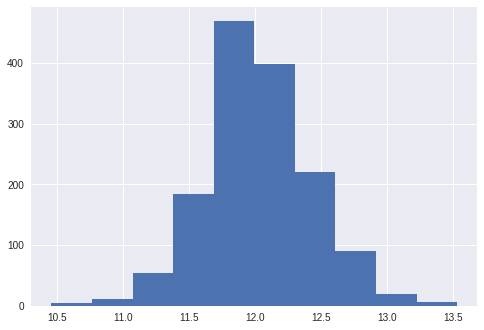

In [0]:
plt.hist(yl)

In [0]:
trn_df, yl = df[:n].copy(), yl[:n]#y[:n]
test_df = df[n:].copy()

In [0]:
def rmse(p, t): return np.sqrt(np.mean((p - t) ** 2))

def make_score(model):
  res = [model.score(trn_x, trn_y), model.score(val_x, val_y)]
  if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
  res += [rmse(model.predict(val_x), val_y)]
  return res

def fit(n_estimators=200, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True):
  model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=n_jobs, min_samples_leaf=min_samples_leaf,
                                max_features=max_features, oob_score=oob_score)
  model.fit(trn_x, trn_y)
  display(make_score(model))
  return model

In [0]:
trn_x, val_x, trn_y, val_y = sklearn.model_selection.train_test_split(trn_df, yl, test_size=0.3, random_state=41)
m = fit()

[0.9662720172294587,
 0.8832586603749916,
 0.8835539683325608,
 0.13773143192260823]

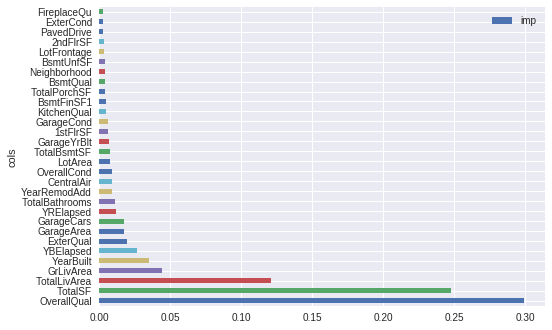

In [0]:
fi = rf_feat_importance(m, trn_df)
fi[:30].plot('cols', 'imp', 'barh')

In [0]:
fi[:20]

,cols,imp
62,OverallQual,0.299254
81,TotalSF,0.247755
82,TotalLivArea,0.120757
38,GrLivArea,0.044732
76,YearBuilt,0.034994
79,YBElapsed,0.026530
22,ExterQual,0.019601
31,GarageArea,0.017893
32,GarageCars,0.017552
80,YRElapsed,0.012328


In [0]:
keep = fi[fi.imp > 0.003].cols
display(len(keep))
df_keep = df[keep].copy()
trn_df = df_keep[:n].copy()
test_df = df_keep[n:].copy()
trn_x, val_x, trn_y, val_y = sklearn.model_selection.train_test_split(trn_df, yl, test_size=0.3, random_state=41)
m = fit()

27

[0.9629182311785808, 0.8827904737989747, 0.8823058710473732, 0.138007338830995]

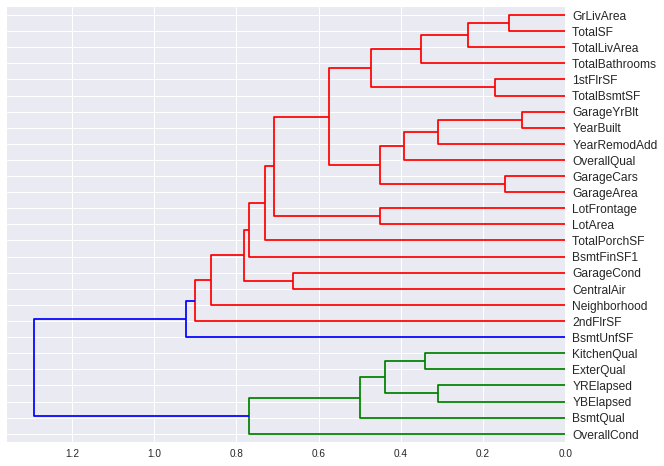

In [0]:
from scipy.cluster import hierarchy as hc
cor = np.round(scipy.stats.spearmanr(trn_df).correlation, 4)
cor_condensed = hc.distance.squareform(1 - cor)
z = hc.linkage(cor_condensed, method='average')
fig = plt.figure(figsize=(10,8))
dendrogram = hc.dendrogram(z, labels=trn_df.columns, orientation='left', leaf_font_size=12)
plt.show()

In [0]:
keep.values

array(['OverallQual', 'TotalSF', 'TotalLivArea', 'GrLivArea', 'YearBuilt', 'YBElapsed', 'ExterQual',
       'GarageArea', 'GarageCars', 'YRElapsed', 'TotalBathrooms', 'YearRemodAdd', 'CentralAir',
       'OverallCond', 'LotArea', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'GarageCond', 'KitchenQual',
       'BsmtFinSF1', 'TotalPorchSF', 'BsmtQual', 'Neighborhood', 'BsmtUnfSF', 'LotFrontage', '2ndFlrSF'],
      dtype=object)

In [0]:
m = fit(min_samples_leaf=1)

[0.983871577939327,
 0.8859291532414196,
 0.8826073971499095,
 0.13614699464846672]

## Model Interpretation

In [0]:
%time preds = np.stack([t.predict(val_x) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 142 ms, sys: 1.96 ms, total: 144 ms
Wall time: 147 ms


(12.073924683347627, 0.07902359870887297)

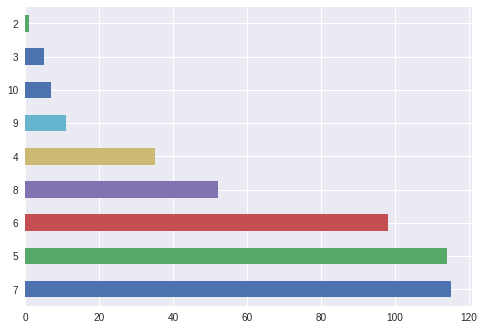

In [0]:
x = val_x.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x['SalePrice'] = val_y
x.OverallQual.value_counts().plot.barh();

In [0]:
flds = ['OverallQual', 'SalePrice', 'pred', 'pred_std']
oq_summ = x[flds].groupby('OverallQual', as_index=False).mean()
oq_summ

,OverallQual,SalePrice,pred,pred_std
0,2,10.471978,11.196668,0.259531
1,3,11.166245,11.333459,0.271934
2,4,11.535102,11.616779,0.173371
3,5,11.773697,11.798080,0.159453
4,6,12.003492,11.997250,0.137785
5,7,12.222000,12.198389,0.139262
6,8,12.477638,12.470133,0.153298
7,9,12.753940,12.727588,0.164472
8,10,13.100623,12.917763,0.159669


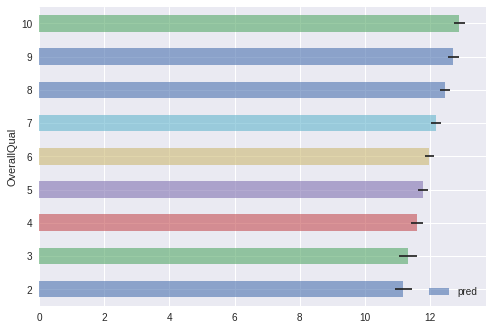

In [0]:
oq_summ.plot('OverallQual', 'pred', 'barh', xerr='pred_std', alpha=0.6)

In [0]:
oq_summ = x[flds].groupby('OverallQual').mean()
(oq_summ.pred_std / oq_summ.pred).sort_values(ascending=False)

OverallQual
3     0.023994
2     0.023179
4     0.014924
5     0.013515
9     0.012922
10    0.012360
8     0.012293
6     0.011485
7     0.011416
dtype: float64

In [0]:
np.expm1(11.333459) - np.expm1(11.166245), np.expm1(11.196668) - np.expm1(10.471978)

(12868.476282683972, 37575.18124346292)

In [0]:
!pip install -q pdpbox plotnine scikit-misc
from pdpbox import pdp
from plotnine import *

(26, <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbf133c88>)

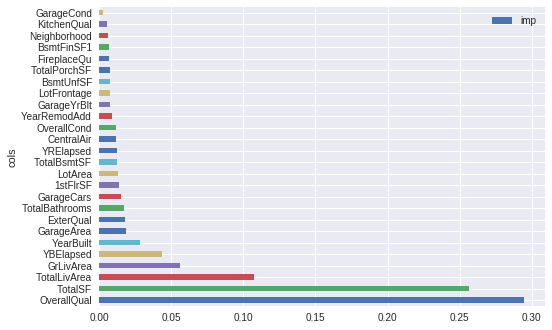

In [0]:
fi = rf_feat_importance(m, trn_df)
len(fi), fi.plot('cols', 'imp', 'barh')

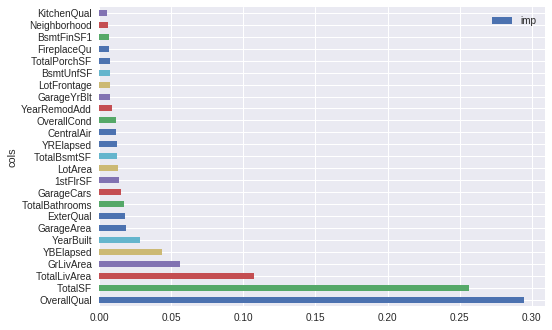

In [0]:
fi[fi.imp > 0.005].plot('cols', 'imp', 'barh')

In [0]:
train_df = get_sample(data[:n], 500)

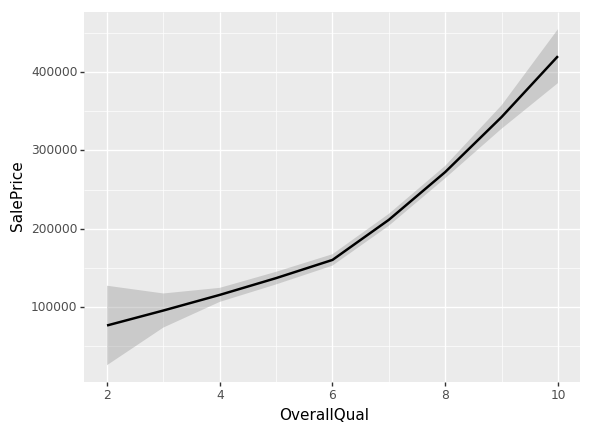

<ggplot: (8739385308708)>

In [0]:
ggplot(train_df, aes('OverallQual', 'SalePrice')) + stat_smooth(se=True, method='loess')

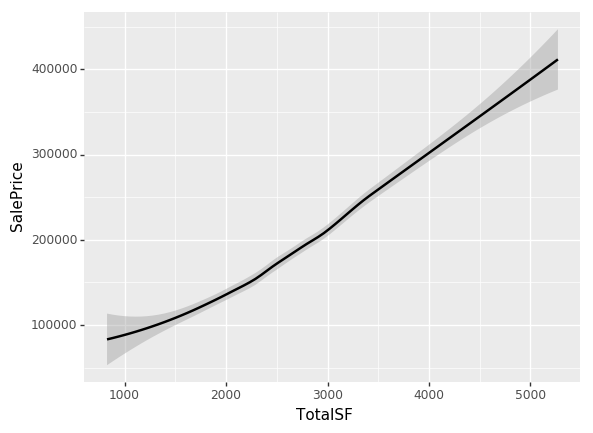

<ggplot: (8739385241436)>

In [0]:
ggplot(train_df, aes('TotalSF', 'SalePrice')) + stat_smooth(se=True, method='loess')

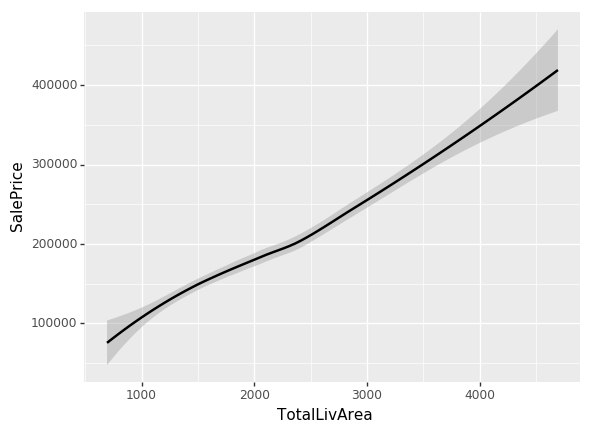

<ggplot: (-9223363297469570672)>

In [0]:
ggplot(train_df, aes('TotalLivArea', 'SalePrice')) + stat_smooth(se=True, method='loess')

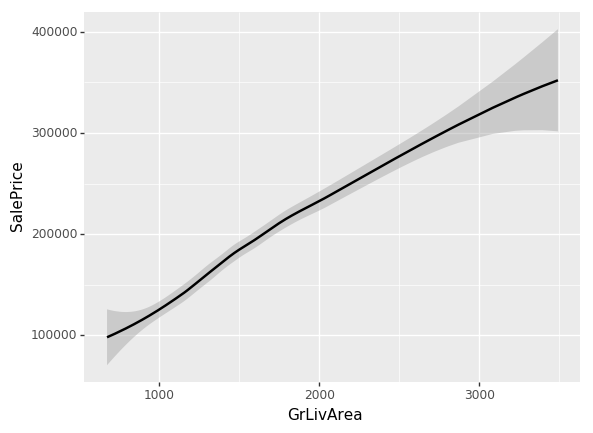

<ggplot: (8739385165618)>

In [0]:
ggplot(train_df, aes('GrLivArea', 'SalePrice')) + stat_smooth(se=True, method='loess')

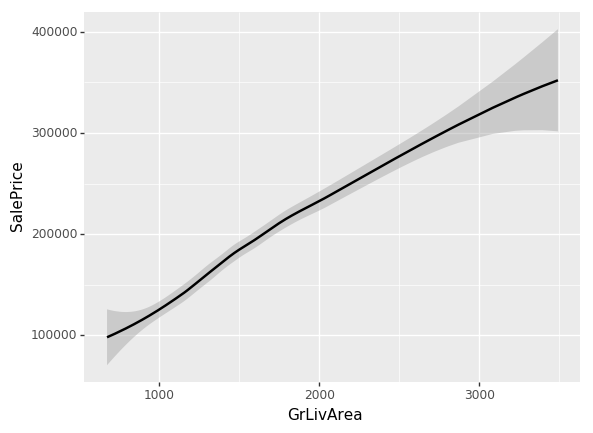

<ggplot: (-9223363297469620315)>

In [0]:
ggplot(train_df, aes('GrLivArea', 'SalePrice')) + stat_smooth(se=True, method='loess')

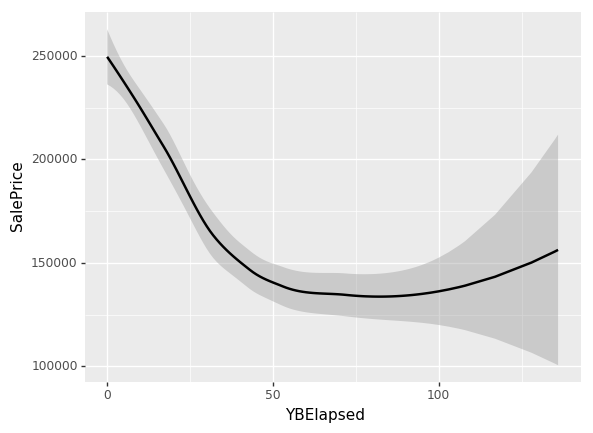

<ggplot: (-9223363297469658031)>

In [0]:
ggplot(train_df, aes('YBElapsed', 'SalePrice')) + stat_smooth(se=True, method='loess')

In [0]:
ggplot(train_df, aes('YearBuilt', 'SalePrice')) + stat_smooth(se=True, method='loess')

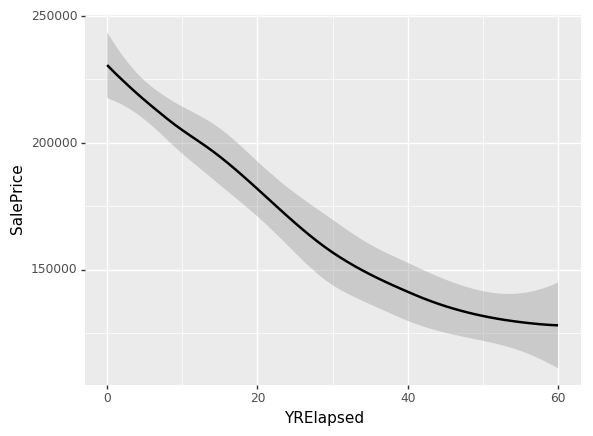

<ggplot: (-9223363297469645098)>

In [0]:
ggplot(train_df, aes('YRElapsed', 'SalePrice')) + stat_smooth(se=True, method='loess')

In [0]:
x = get_sample(trn_df, 500)

In [0]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, 
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbe5e6d68>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbe60c898>})

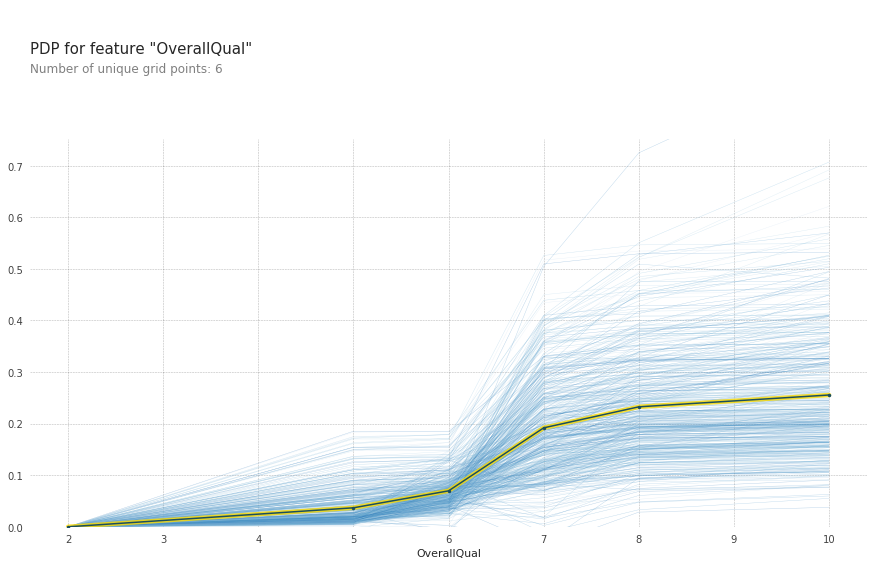

In [0]:
plot_pdp('OverallQual')

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbc46b470>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbc4b7080>})

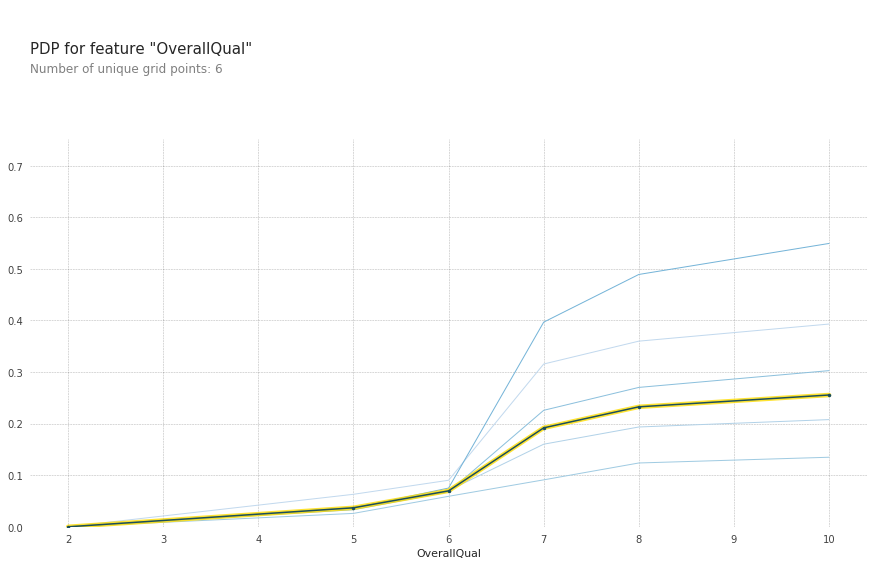

In [0]:
plot_pdp('OverallQual', clusters=5)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbd2d78d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2cbd336ac8>})

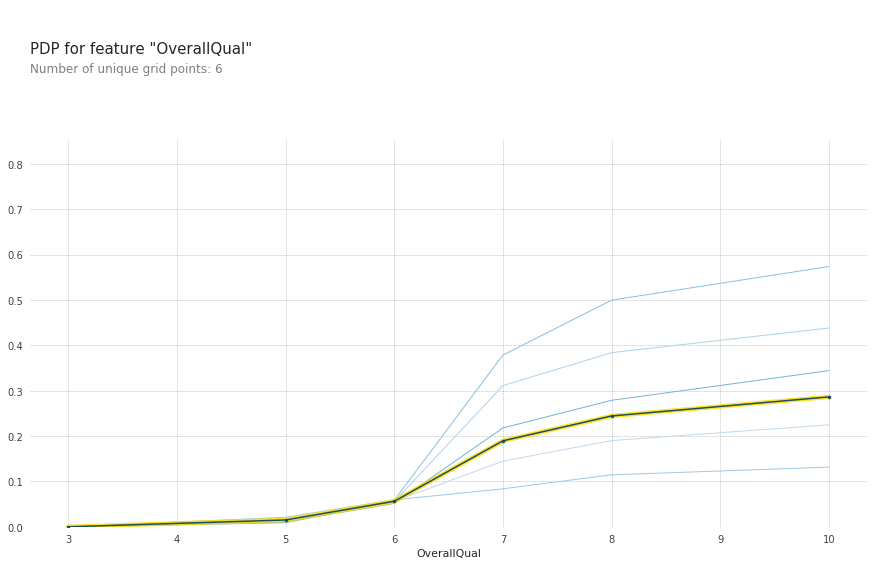

In [0]:
x = get_sample(trn_df[trn_df.GrLivArea > trn_df.GrLivArea.median()], 100)
# x = get_sample(trn_df[trn_df.GrLivArea > 2000], 100)
plot_pdp('OverallQual', 5)

## Final

In [0]:
trn_df.loc[trn_df.OverallQual < 4, 'OverallQual'] = 3
test_df.loc[test_df.OverallQual < 4, 'OverallQual'] = 3

In [0]:
m = RandomForestRegressor(n_estimators=500, n_jobs=-1, min_samples_leaf=1, max_features=0.5, oob_score=True)
m.fit(trn_df, yl)
m.score(trn_df, yl), m.oob_score_

(0.9859670555143936, 0.8967994489042647)

In [0]:
preds = m.predict(test_df)
sub = pd.read_csv(PATH/'sample_submission.csv')
sub.SalePrice = np.floor(np.expm1(preds))
sub.to_csv('submission.csv', index=False)

In [0]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m ""

100% 19.9k/19.9k [00:05<00:00, 3.64kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques